# Importing required libraries:

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
%matplotlib inline
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import  RandomForestClassifier , GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore") 

# Data Collection:

In [54]:
loan_data = pd.read_csv("loan_prediction.csv")

In [55]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [56]:
# Observation: here we can see that the data has "nan" vales and so we have to fix them to get good accuracy. 

# What are the columns?

In [5]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Size of the data:

In [6]:
loan_data.shape

(614, 13)

In [7]:
# Observation: here we can see that the data consists of 614 rows and 13 columns.

# What are the different datatypes present?

In [46]:
loan_data.dtypes

NameError: name 'loan_data' is not defined

In [9]:
# Observation: Here we can see that the data is with "float" and "object" types data.

# Information of the data:

In [10]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
# Observation: Here we can see that few columns in the data are with "nan" values and so we have to treat them in our model for
# the good accuracy.

# Checking the null-values in the data:

In [12]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
# Observation: Here we can see that most of our columns are with null values.

In [14]:
loan_data.isnull().values.any()

True

# Finding the missing values if any: 

In [15]:
loan_data.isnull().values.any()

True

In [16]:
# observation: We can observe that there are  missing values present.

# Statistical information:

In [17]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [18]:
# Observation: Here we can say that the "Count" is not as equal as number of records and so we have to set the value equal to columns
# and also we can see that the "mean" and "std" values are with large difference in most of the columns and in few "std" is greater
# than "mean".

In [19]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Dropping the unrequired columns:

In [20]:
# the column "Loan_ID" will not have any impact on the "prediction",so we can drop it.

In [21]:
loan_data = loan_data.drop(["Loan_ID"] , axis = 1)

In [22]:
loan_data.shape

(614, 12)

In [23]:
# Observation: Here we can see that we have dropped the column successfully.

# Checking the count o our label: "Loan_Status" :

In [24]:
Loan_Status_count = pd.DataFrame(loan_data["Loan_Status"].value_counts())

In [25]:
Loan_Status_count

,Loan_Status
Y,422
N,192


In [26]:
# Observation: Here we can see that the number loan approvals are 422 and the number of loan rejections are 192.

# Filling the null-values:

In [27]:
loan_data["Gender"].fillna(loan_data["Gender"].mode()[0],inplace = True)

In [28]:
loan_data["Married"].fillna(loan_data["Married"].mode()[0],inplace = True)

In [29]:
loan_data["Self_Employed"].fillna(loan_data["Self_Employed"].mode()[0],inplace = True)

In [30]:
loan_data["Dependents"].fillna(loan_data["Dependents"].mode()[0],inplace = True)

In [31]:
loan_data["LoanAmount"].fillna(loan_data["LoanAmount"].mode()[0],inplace = True)

In [32]:
loan_data["Loan_Amount_Term"].fillna(loan_data["Loan_Amount_Term"].mean(),inplace = True)

In [33]:
loan_data["Credit_History"].fillna(loan_data["Credit_History"].mode()[0],inplace = True)

In [41]:
# Observation: Here we can see that we have filled "Nan" values in the particular columns.

# Checking the null-values:

In [34]:
loan_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [35]:
# Observation: here we can see that all the columns are without null-values.

In [36]:
# Also can see the null/missing values:

loan_data.isnull().values.any()

False

In [37]:
# observation: Here we can see that absolutely there are no null-values.

# Plotting the null-values through heat-map:

<AxesSubplot:>

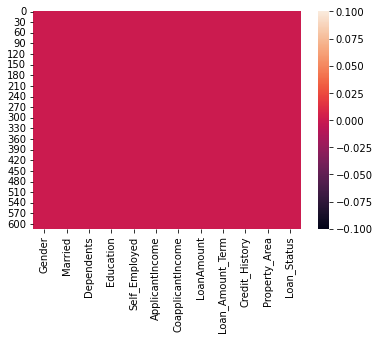

In [38]:
sns.heatmap(loan_data.isnull())

In [39]:
# observation: Here we can that there are no null-values can be seen in the heatmap.

# Visualization:

## Univariate Analysis:

In [40]:
loan_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Firstly we will plot for our label: "Loan_Status":

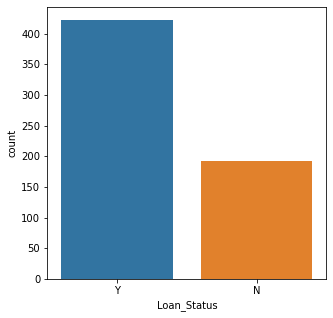

In [41]:
plt.figure(figsize=(5,5))
sns.countplot(loan_data.Loan_Status);

In [40]:
#Observation: Here we can see that the category "Y" has the highest count compared to the category "N".

# Gender:

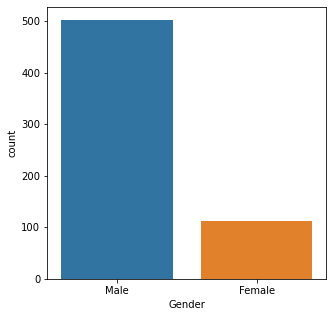

In [42]:
plt.figure(figsize=(5,5))
sns.countplot(loan_data.Gender);

In [39]:
# Observation: Here we can see that the category "Male" has the highest count in the column "Gender" and the least is for the "Female".

In [43]:
loan_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Married:

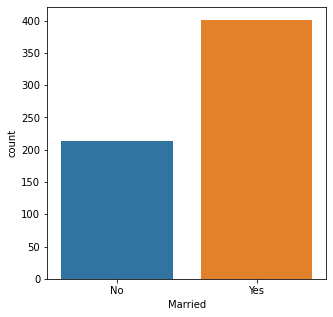

In [44]:
plt.figure(figsize=(5,5))
sns.countplot(loan_data.Married);

In [38]:
# Observation: Here we can see that the highest count is for the category "Yes" in the column "Married" and the least for the other.

# Dependents:

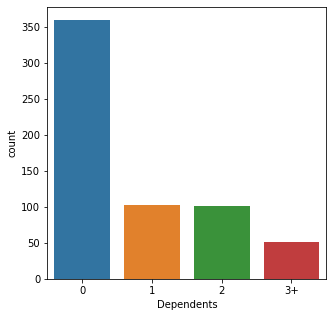

In [45]:
# Dependents:

plt.figure(figsize=(5,5))
sns.countplot(loan_data.Dependents);

In [37]:
# Observation: Here we can see that the highest count is for the category "0" of the column "Dependents".

# Education:

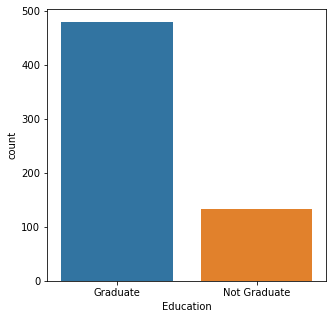

In [46]:
# Education:

plt.figure(figsize=(5,5))
sns.countplot(loan_data.Education);

In [36]:
# Observation: Here we can see that the count is high in column "Graduate" and low in the other.

# Self_Employed:

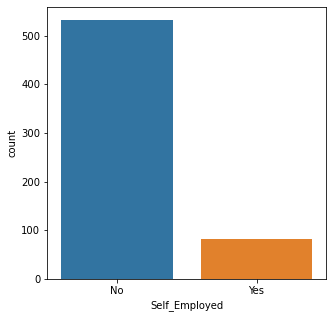

In [47]:
# Self_Employed:

plt.figure(figsize=(5,5))
sns.countplot(loan_data.Self_Employed);

In [47]:
# Observation: Here we can see that the count is high in the category "No" of the column "Self_Employed".

# ApplicantIncome:

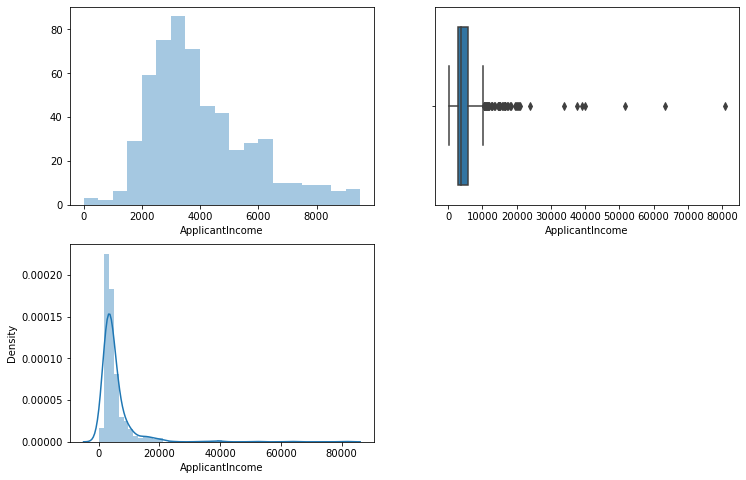

In [48]:
# ApplicantIncome:

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(loan_data['ApplicantIncome'], kde=False, bins=range(0, 10000, 500));
plt.subplot(2,2,2)
sns.boxplot(loan_data['ApplicantIncome']);
plt.subplot(2,2,3)
sns.distplot(loan_data['ApplicantIncome']);

In [34]:
# Observation: Here we can see tnat there are outliers present in the boxplot and the distribution curve is with narrow in its
# peak and has skewness.

# CoapplicantIncome:

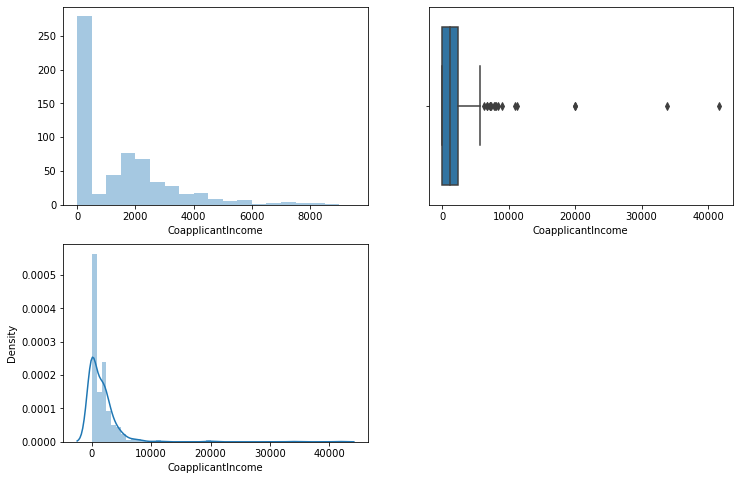

In [49]:
# CoapplicantIncome:

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(loan_data['CoapplicantIncome'], kde=False, bins=range(0, 10000, 500));
plt.subplot(2,2,2)
sns.boxplot(loan_data['CoapplicantIncome']);
plt.subplot(2,2,3)
sns.distplot(loan_data['CoapplicantIncome']);

In [33]:
# Observation: Here we can see tnat there are outliers present in the boxplot and the distribution curve is with narrow in its
# peak and has skewness.

# LoanAmount:

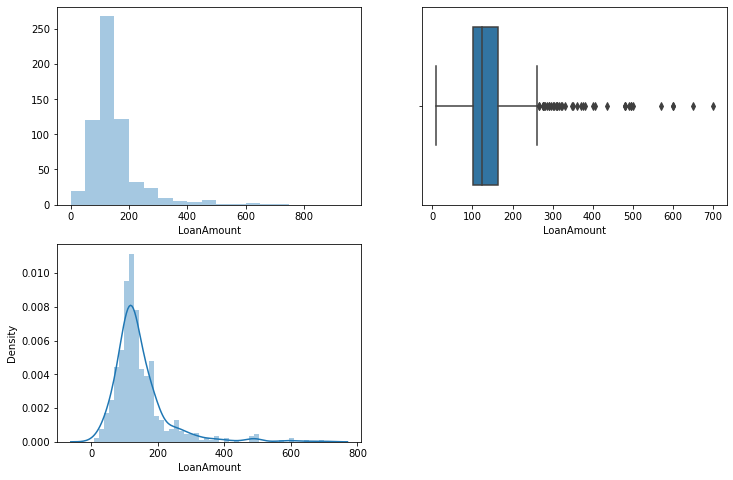

In [50]:
# LoanAmount:

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(loan_data['LoanAmount'], kde=False, bins=range(0, 1000, 50));
plt.subplot(2,2,2)
sns.boxplot(loan_data['LoanAmount']);
plt.subplot(2,2,3)
sns.distplot(loan_data['LoanAmount']);

In [32]:
# Observation: Here we can see tnat there are outliers present in the boxplot and the distribution curve is with narrow in its
# peak and has skewness.

# Loan_Amount_Term:

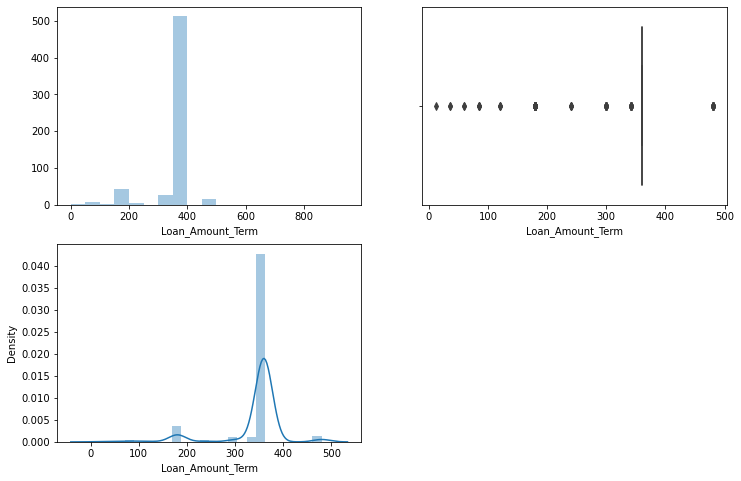

In [51]:
# Loan_Amount_Term:

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(loan_data['Loan_Amount_Term'], kde=False, bins=range(0, 1000, 50));
plt.subplot(2,2,2)
sns.boxplot(loan_data['Loan_Amount_Term']);
plt.subplot(2,2,3)
sns.distplot(loan_data['Loan_Amount_Term']);

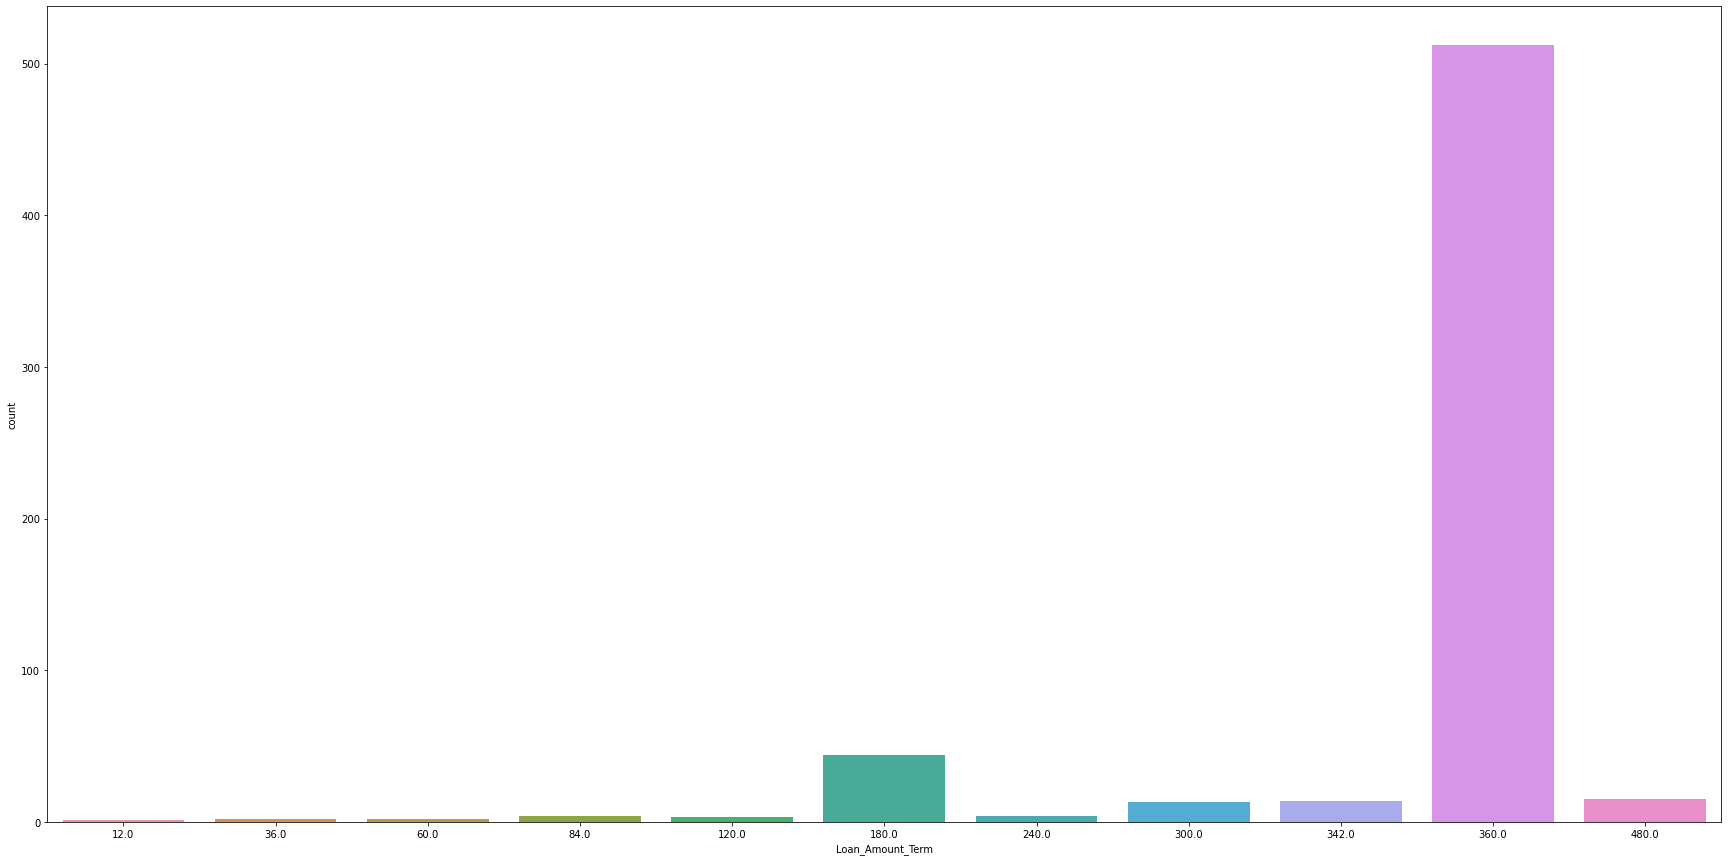

In [52]:
plt.figure(figsize=(30,15))
sns.countplot(loan_data.Loan_Amount_Term);

In [31]:
# Observation: Here we can see that the category "12.0" is with lowest count and highest count is in the category "360.0"  and
# also there are outliers can be seen in boxplot and also we can see that there is no normal distribution curve at all.

# Credit_History:

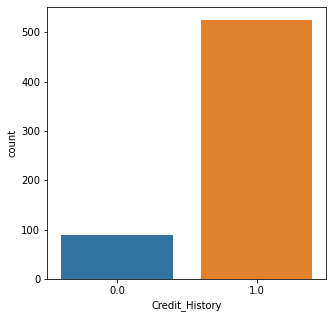

In [53]:
# Credit_History:

plt.figure(figsize=(5,5))
sns.countplot(loan_data.Credit_History);

In [29]:
# Observation: Here we can see that the "Credit_History" is highest in category "1.0" .

# Property_Area:

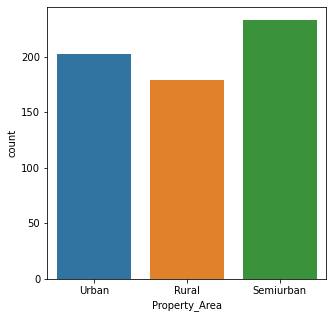

In [54]:
plt.figure(figsize=(5,5))
sns.countplot(loan_data.Property_Area);

In [28]:
# Observation: Here we can see that the Count is more in the Category "Semiurban" and least in the category "Rural".

# Bivariate Analysis:

## As our prediction is "Loan_status", now we will analyse all the columns based on it:

In [55]:
loan_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## a) Relationship between "Loan_Status" and "Gender":

<AxesSubplot:xlabel='Loan_Status', ylabel='Gender'>

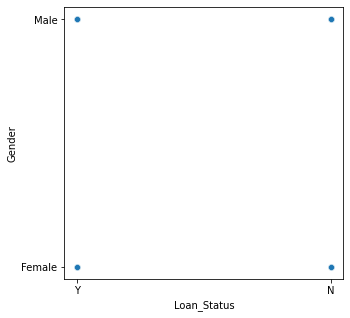

In [56]:
plot = plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Loan_Status', y = 'Gender', data = loan_data )

In [27]:
# Observation: Here we can see that there is no effective plots between the columns and with no distribution pattern and density.

# Relationship between "Loan_status" and "Married":

<AxesSubplot:xlabel='Loan_Status', ylabel='Married'>

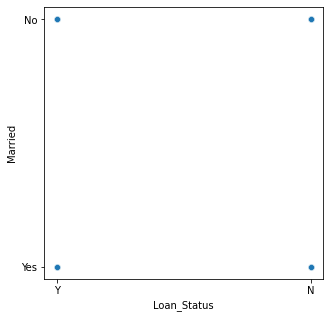

In [57]:
plot = plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Loan_Status', y = 'Married', data = loan_data )

In [26]:
# Observation: Here we can see that there is no effective plots between the columns and with no distributio pattern and density.

# Relationship between "Loan_status" and "Dependents":

<AxesSubplot:xlabel='Loan_Status', ylabel='Dependents'>

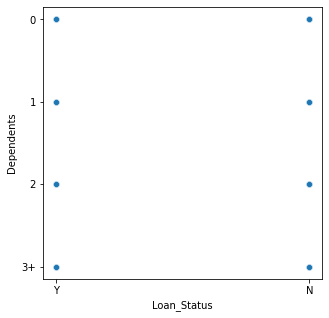

In [58]:
plot = plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Loan_Status', y = 'Dependents', data = loan_data )

In [25]:
# Observation: Here we can see that as the "Dependents" are increasing the categories Y and N are with no effective distribution pattern.

# Relationship between "Loan_status" and "Education":

<AxesSubplot:xlabel='Loan_Status', ylabel='Education'>

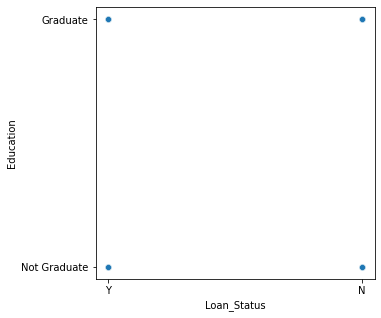

In [59]:
plot = plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Loan_Status', y = 'Education', data = loan_data )

In [24]:
# Observation: Here we can see that there is no effective plots between the columns and with no distributio pattern and density.

# Relationship between "Loan_status" and "Self_Employed":

<AxesSubplot:xlabel='Loan_Status', ylabel='Self_Employed'>

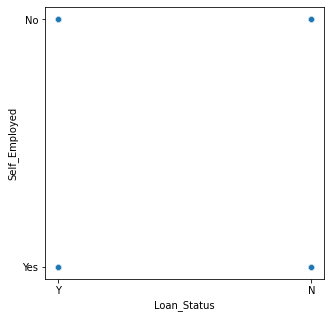

In [60]:
plot = plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Loan_Status', y = 'Self_Employed', data = loan_data )

In [23]:
# Observation: Here we can see that there is no effective plots between the columns and with no distributio pattern and density.

# Relationship between "Loan_status" and "ApplicantIncome":

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

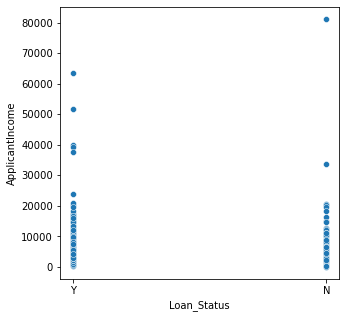

In [61]:
plot = plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Loan_Status', y = 'ApplicantIncome', data = loan_data )

In [21]:
# Observation: Here we can see that the highest value of "ApplicantIncome" is with few and no density in the category "Y" of the Loan_status
# and in the category "N" there is no density and in both of them the density is more in lower side of the "ApplicantIncome".

# Relationship between "Loan_status" and "CoapplicantIncome":

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

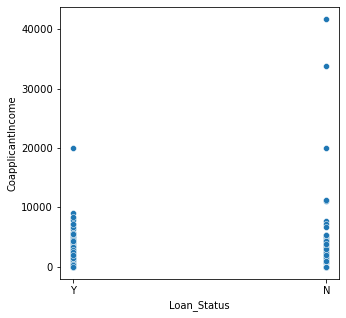

In [62]:
plot = plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Loan_Status', y = 'CoapplicantIncome', data = loan_data )

In [20]:
# Observation: Here we can see that the highest value of "CoapplicantIncome" is with no density in the category "Y" of the Loan_status
# and in the category "N" there are few also with no density and in both of them the density is more in lower side of the "CoapplicantIncome".

# Relationship between "Loan_status" and "LoanAmount":

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

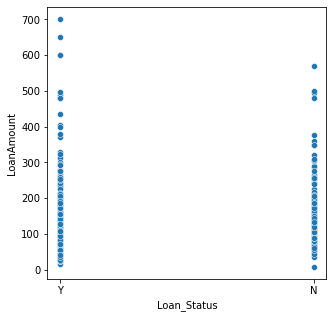

In [63]:
plot = plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Loan_Status', y = 'LoanAmount', data = loan_data )

In [19]:
# Observation: Here we can see that as the "LoanAmount" increases the density distribution decreased and is more in both of the
# categories of the column "Loan_Status" in the lower side of the "LoanAmount".

# Relationship between "Loan_Status" and "Loan_Amount_Term":

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

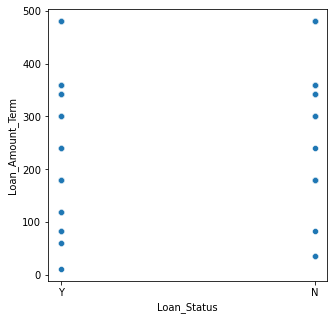

In [64]:
plot = plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Loan_Status', y = 'Loan_Amount_Term', data = loan_data )

In [18]:
# Observation: Here we can see that as the "Loan_Amount_Term" increases we can see that there is uneven distribution of the 
# "Loan_Status" (Y and N) .

# Relationship between "Loan_Status" and "Credit_History":

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

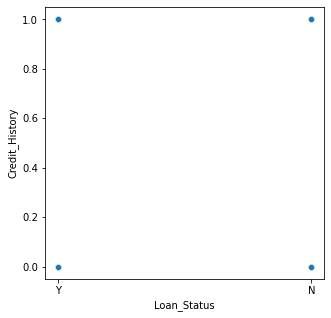

In [65]:
plot = plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Loan_Status', y = 'Credit_History', data = loan_data )

In [17]:
# Observation: Here we can see that in the column "Credit_History" there is Loan_Status(Y) for Credit_History (0.0) and also there
# is Loan_Status(N) for Credit_History(0.0) and is same for highest Credit_History(1.0)

# Relationship between "Loan_Status" and "Property_Area":

<AxesSubplot:xlabel='Loan_Status', ylabel='Property_Area'>

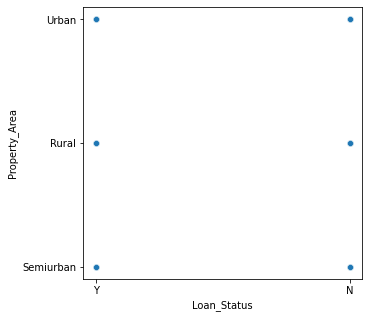

In [66]:
plot = plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Loan_Status', y = 'Property_Area', data = loan_data )

In [16]:
# Observation: Here we can see that as the column "Property_Area" is with different categories and few of them in each of the 
# categories are with Loan_Status(Y) and the few with Loan_Status(N)

# Multivariate Analysis:

## Finding the correlation between the variables:

In [67]:
corr_data = loan_data.corr()

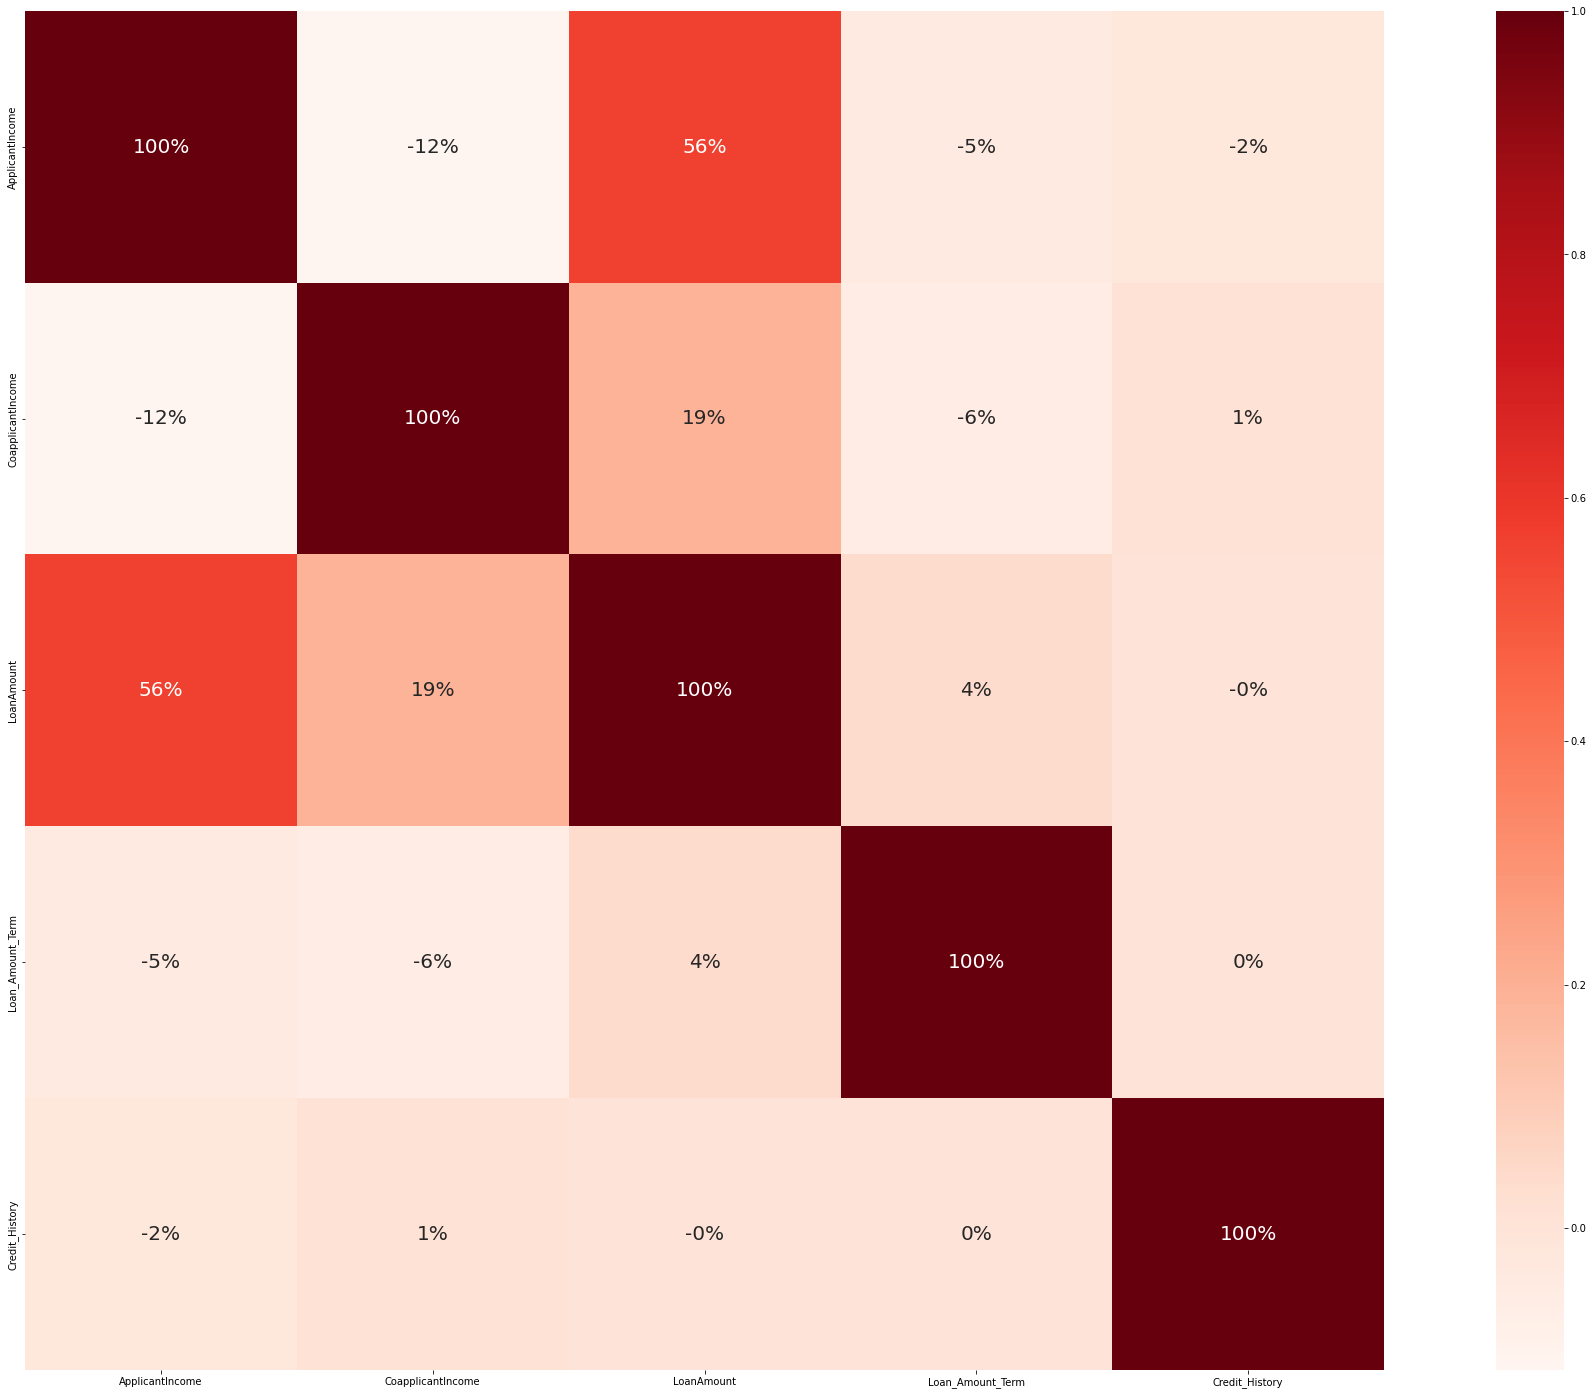

In [68]:
plt.figure(figsize =(40,25))
sns.heatmap(corr_data,annot = True,fmt = ".0%",cbar = True,square = True,annot_kws = {'size': 20}, cmap = 'Reds')
plt.show()

In [15]:
# Observation: Here we can see that all the variables with low correlation with eachother and the columns "Loanamount" and the 
# "Applicantincome" are with correlation of 56%.

## Checking the data description through statistical analysis of the data:

In [69]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.000000,0.855049
std,6109.041673,2926.248369,84.180967,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [14]:
# Observation: Here we can see that the columns are with equal count to the number of rows present.

# Transforming the data :

## Transforming the non-numerical columns into numerical:

In [70]:
from sklearn.preprocessing import LabelEncoder

In [71]:
# Inspite of mentioning each and every which has strings we user "forloop" here as the data seems to be big.

In [72]:
for column in loan_data.columns:
    if loan_data[column].dtype == np.number:
        continue
    loan_data[column] = LabelEncoder().fit_transform(loan_data[column])
        

In [73]:
loan_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,376,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,306,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,139,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,90,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,381,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,125,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,275,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,431,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,422,0.0,187.0,360.0,1.0,2,1


In [13]:
# Observation: Here we can see that the "non-numerical" data is transformed into the numerical data.

# Checking the Outliers:

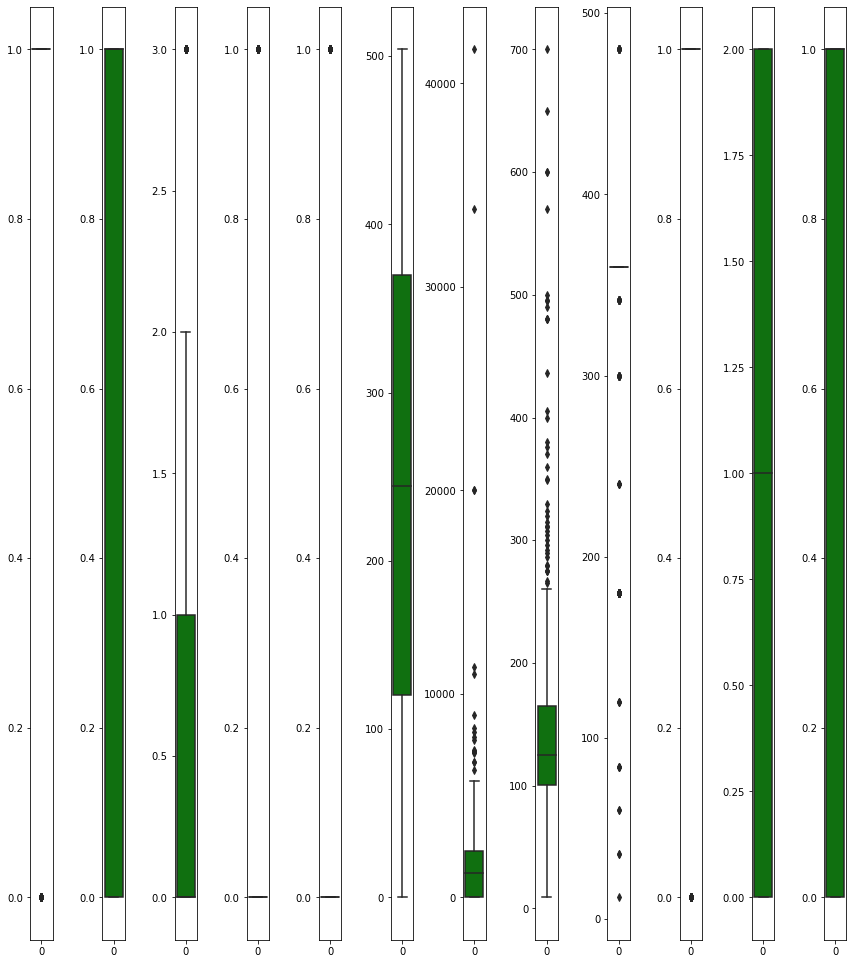

In [76]:
col_list = loan_data.columns.values
ncol = 32
nrows = 12
plt.figure(figsize = (ncol,5*ncol))
for i in range (0, len(col_list)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data = loan_data[col_list[i]],color = 'green', orient = 'v')
    plt.tight_layout()

In [12]:
# Observation: Here we can see that few of the columns are with the outliers and also we have to remove the outliers and nextly 
# we have to reduce the outliers to get a good accuracy with our model building.

# Removing the Outliers using - Z - Score method:

In [77]:
from scipy.stats import zscore
z = np.abs(zscore(loan_data))
z.shape

(614, 12)

In [78]:
threshold = 3
print(np.where(z>3))

(array([  9,  14,  68,  94, 130, 133, 155, 171, 177, 177, 242, 262, 278,
       308, 313, 333, 369, 402, 417, 432, 487, 495, 497, 506, 523, 525,
       546, 561, 575, 581, 585, 600, 604], dtype=int64), array([6, 8, 8, 8, 7, 8, 7, 7, 6, 7, 8, 8, 7, 7, 8, 7, 7, 6, 6, 7, 7, 8,
       8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7], dtype=int64))


In [79]:
len(np.where(z>3))

2

In [80]:
len(np.where(z>3)[0])

33

In [82]:
loan_data_new = loan_data[(z<3).all(axis = 1)]
print(loan_data.shape)
print(loan_data_new.shape)

(614, 12)
(582, 12)


In [11]:
# Observation: Here we can see that the rows are reduced from the original data.

# Loss percentage calculation:

In [83]:
loss_percent = (614-582)/614*100
print(loss_percent)

5.211726384364821


In [10]:
# Observation: Here we can see that the data percent lost is 5.2%

# Skewness:

In [84]:
loan_data_new.skew()

Gender              -1.636555
Married             -0.636160
Dependents           1.044261
Education            1.319920
Self_Employed        2.244210
ApplicantIncome      0.044622
CoapplicantIncome    1.348959
LoanAmount           1.243160
Loan_Amount_Term    -2.090517
Credit_History      -1.971149
Property_Area       -0.048661
Loan_Status         -0.818715
dtype: float64

In [91]:
features = ["Gender","Dependents","Education","Self_Employed","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]

In [92]:
features

['Gender',
 'Dependents',
 'Education',
 'Self_Employed',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

# Removing Skewness through Power Transformer:

In [93]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [94]:
loan_data_new[features] = scaler.fit_transform(loan_data_new[features].values)
loan_data_new[features]

,Gender,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.474619,-0.823005,-0.538949,-0.381666,-1.108292,-0.138457,0.153233,0.419235
1,0.474619,1.051734,-0.538949,-0.381666,0.705241,0.014125,0.153233,0.419235
2,0.474619,-0.823005,-0.538949,2.620089,-1.108292,-1.448676,0.153233,0.419235
3,0.474619,-0.823005,1.855464,-0.381666,0.896464,-0.138457,0.153233,0.419235
4,0.474619,-0.823005,-0.538949,-0.381666,-1.108292,0.246556,0.153233,0.419235
...,...,...,...,...,...,...,...,...
609,-2.106953,-0.823005,-0.538949,-0.381666,-1.108292,-1.298899,0.153233,0.419235
610,0.474619,1.369490,-0.538949,-0.381666,-1.108292,-2.400398,-2.647671,0.419235
611,0.474619,1.051734,-0.538949,-0.381666,0.042695,1.764030,0.153233,0.419235
612,0.474619,1.282615,-0.538949,-0.381666,-1.108292,0.953582,0.153233,0.419235


In [95]:
loan_data_new.skew()

Gender              -1.636555
Married             -0.636160
Dependents           0.406969
Education            1.319920
Self_Employed        2.244210
ApplicantIncome      0.044622
CoapplicantIncome   -0.143240
LoanAmount          -0.058572
Loan_Amount_Term     0.391118
Credit_History      -1.971149
Property_Area       -0.048661
Loan_Status         -0.818715
dtype: float64

In [9]:
# Observation: Here we can see that skewness of few of the columns are reduced to certain extent.

# Data preprocessing:

## Seaparating the independent and target variables:

In [96]:
loan_data_new.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [97]:
x = loan_data_new.drop("Loan_Status", axis=1)
y = loan_data_new["Loan_Status"]

In [98]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.474619,0,-0.823005,-0.538949,-0.381666,376,-1.108292,-0.138457,0.153233,0.419235,2
1,0.474619,1,1.051734,-0.538949,-0.381666,306,0.705241,0.014125,0.153233,0.419235,0
2,0.474619,1,-0.823005,-0.538949,2.620089,139,-1.108292,-1.448676,0.153233,0.419235,2
3,0.474619,1,-0.823005,1.855464,-0.381666,90,0.896464,-0.138457,0.153233,0.419235,2
4,0.474619,0,-0.823005,-0.538949,-0.381666,381,-1.108292,0.246556,0.153233,0.419235,2


In [99]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

# Scaling the data using Standard Scaler:

In [100]:
from sklearn.preprocessing import  StandardScaler

In [101]:
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x_scaled

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.474619,-1.366380,-0.823005,-0.538949,-0.381666,0.950626,-1.108292,-0.138457,0.153233,0.419235,1.233857
1,0.474619,0.731861,1.051734,-0.538949,-0.381666,0.451116,0.705241,0.014125,0.153233,0.419235,-1.303615
2,0.474619,0.731861,-0.823005,-0.538949,2.620089,-0.740572,-1.108292,-1.448676,0.153233,0.419235,1.233857
3,0.474619,0.731861,-0.823005,1.855464,-0.381666,-1.090229,0.896464,-0.138457,0.153233,0.419235,1.233857
4,0.474619,-1.366380,-0.823005,-0.538949,-0.381666,0.986305,-1.108292,0.246556,0.153233,0.419235,1.233857
...,...,...,...,...,...,...,...,...,...,...,...
577,-2.106953,-1.366380,-0.823005,-0.538949,-0.381666,-0.840474,-1.108292,-1.298899,0.153233,0.419235,-1.303615
578,0.474619,0.731861,1.369490,-0.538949,-0.381666,0.229905,-1.108292,-2.400398,-2.647671,0.419235,-1.303615
579,0.474619,0.731861,1.051734,-0.538949,-0.381666,1.343098,0.042695,1.764030,0.153233,0.419235,1.233857
580,0.474619,0.731861,1.282615,-0.538949,-0.381666,1.278875,-1.108292,0.953582,0.153233,0.419235,1.233857


# Checking the multicollinearity through VIF :

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [103]:
vif = pd.DataFrame()
vif["features"] = x.columns
vif["vif_Factor"] = [variance_inflation_factor(x_scaled.values, i) for i in range(x_scaled.shape[1])]
vif

,features,vif_Factor
0,Gender,1.219395
1,Married,1.425635
2,Dependents,1.189439
3,Education,1.071152
4,Self_Employed,1.046876
5,ApplicantIncome,1.927113
6,CoapplicantIncome,1.622165
7,LoanAmount,1.663620
8,Loan_Amount_Term,1.048957
9,Credit_History,1.011360


In [8]:
# Observation: Here we can see that VIF values are with less values and are not that affective.

In [104]:
x = x_scaled

# Train_test_split:

In [105]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

# Training the model:

In [106]:
models = {"LogisticRegression" : LogisticRegression(),
          "K-Nearest Neighbors": KNeighborsClassifier(),
          "Decision Tree"      : DecisionTreeClassifier(),
          "Random Forest"      : RandomForestClassifier(),
          "Gradient Boosting"  : GradientBoostingClassifier()}

for name, model in models.items():
    model.fit(x_train,y_train)
    print(name + " is trained now.")

LogisticRegression is trained now.
K-Nearest Neighbors is trained now.
Decision Tree is trained now.
Random Forest is trained now.
Gradient Boosting is trained now.


In [5]:
# Observation: Here we can see that we have trained our models now and our model is ready for testing.

# Testing the model:

In [107]:
for name, model in models.items():
    print(name + ": {:,.2f}%".format(model.score(x_test,y_test)*100))

LogisticRegression: 80.86%
K-Nearest Neighbors: 80.57%
Decision Tree: 76.00%
Random Forest: 81.14%
Gradient Boosting: 80.57%


In [4]:
# Observation: Here we can see that "Random Forest" model is with good accuracy among all the other models.

# Hyper parameter tuning:

## GridSearch CV:

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
parameters ={'n_estimators':[100,150,200,250],
        'criterion':['gini','entropy'],
        'max_depth':[13,15,16,17],
        'min_samples_split':[2,3,4,5,6],
        'bootstrap':[True,False],
        'n_jobs':[-1,-2,-3]}

# Random Forest Classifier:

In [118]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [119]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [13, 15, 16, 17],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 150, 200, 250],
                         'n_jobs': [-1, -2, -3]})

In [120]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 17,
 'min_samples_split': 4,
 'n_estimators': 150,
 'n_jobs': -1}

In [3]:
# Observation: Here we can see that these are the best parameters we got.

# Fitting best parameters to the model:

In [127]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [126]:
RandomForest_model = RandomForestClassifier(bootstrap = False, criterion = 'gini', max_depth = 17, min_samples_split = 2,
                                n_estimators = 250, n_jobs = -3)
RandomForest_model.fit(x_train,y_train)
RandomForest_model_prediction  = RandomForest_model.predict(x_test)
RandomForest_score  = accuracy_score(y_test,RandomForest_model_prediction)
print('The Accuracy score for the Tuned Decision Trees Classifier is' , RandomForest_score)

The Accuracy score for the Tuned Decision Trees Classifier is 0.8


# Classification Report :

In [128]:
print(classification_report(y_test,RandomForest_model_prediction))

              precision    recall  f1-score   support

           0       0.76      0.59      0.67        59
           1       0.81      0.91      0.86       116

    accuracy                           0.80       175
   macro avg       0.79      0.75      0.76       175
weighted avg       0.80      0.80      0.79       175



In [129]:
from sklearn.metrics import roc_auc_score

In [131]:
print(roc_auc_score(y_test, RandomForest_model_prediction))

0.7491963763880771


In [2]:
# Observation: Here we can see that ROC - AUC Curve is with 74.9%

# ROC - AUC Curve:

In [130]:
from sklearn.metrics import roc_curve, auc

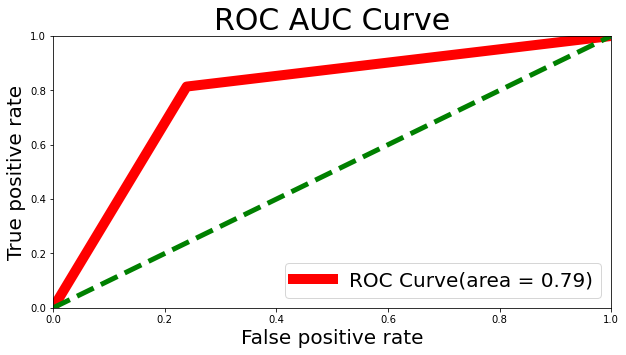

In [140]:
from sklearn.metrics import roc_curve, auc
fpr,tpr, thresholds  = roc_curve(RandomForest_model_prediction, y_test)
roc_auc = auc(fpr,tpr)

plt.figure(figsize = (10,5))
plt.plot(fpr, tpr, lw=10, color = 'red',label = 'ROC Curve(area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],lw =5, color ='green', linestyle = '--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False positive rate', fontsize = 20)
plt.ylabel('True positive rate', fontsize  =20)
plt.title('ROC AUC Curve', fontsize = 30)
plt.legend(loc ='lower right', fontsize = 20)
plt.show()


In [1]:
# Observation: Here we can see that ROC Curve is 79% which is a good accuracy.

So our best model ie., RandomForestModel is with accuracy of 79%

# Saving the model:

In [43]:
from sklearn.ensemble import  RandomForestClassifier 

In [45]:
import pickle
filename='loan_data.pkl'
pickle.dump(RandomForestClassifier,open(filename,'wb'))